## Recomendação com mais de um parâmetro

Para um melhor sistema de organização uma divisão efetiva é baseada na árvore binária, que irá fazer uma busca relacionando os itens da árvore para executa-la

In [15]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

In [12]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)

filmes.columns = ['filme_id', 'titulo', 'generos']

generos = filmes.generos.str.get_dummies()
dados_filmes = pd.concat([filmes, generos], axis = 1)

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [13]:
modelo = AgglomerativeClustering(n_clusters = 19)

grupos = modelo.fit_predict(generos_escalados)

In [14]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  1.5436978,  69.4209   ],
       [-73.14634  ,  33.328365 ],
       [-18.262674 , -38.581768 ],
       ...,
       [ 16.186829 ,   8.784275 ],
       [ 10.053848 ,  52.877007 ],
       [-22.458567 ,  -7.090488 ]], dtype=float32)

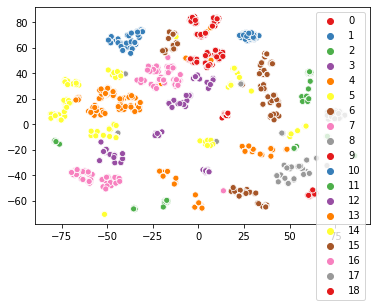

In [18]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:,1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 19))

#### Plotando o dendograma (quase árvore)

Queremos recomendar por uma prossimidade mais lógica do que um simples agrupamento, temos que recomendar por um dendedograma, com ele poderemos análisar a escolha por hierarquia

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020682DC6160>,
      dtype=object)

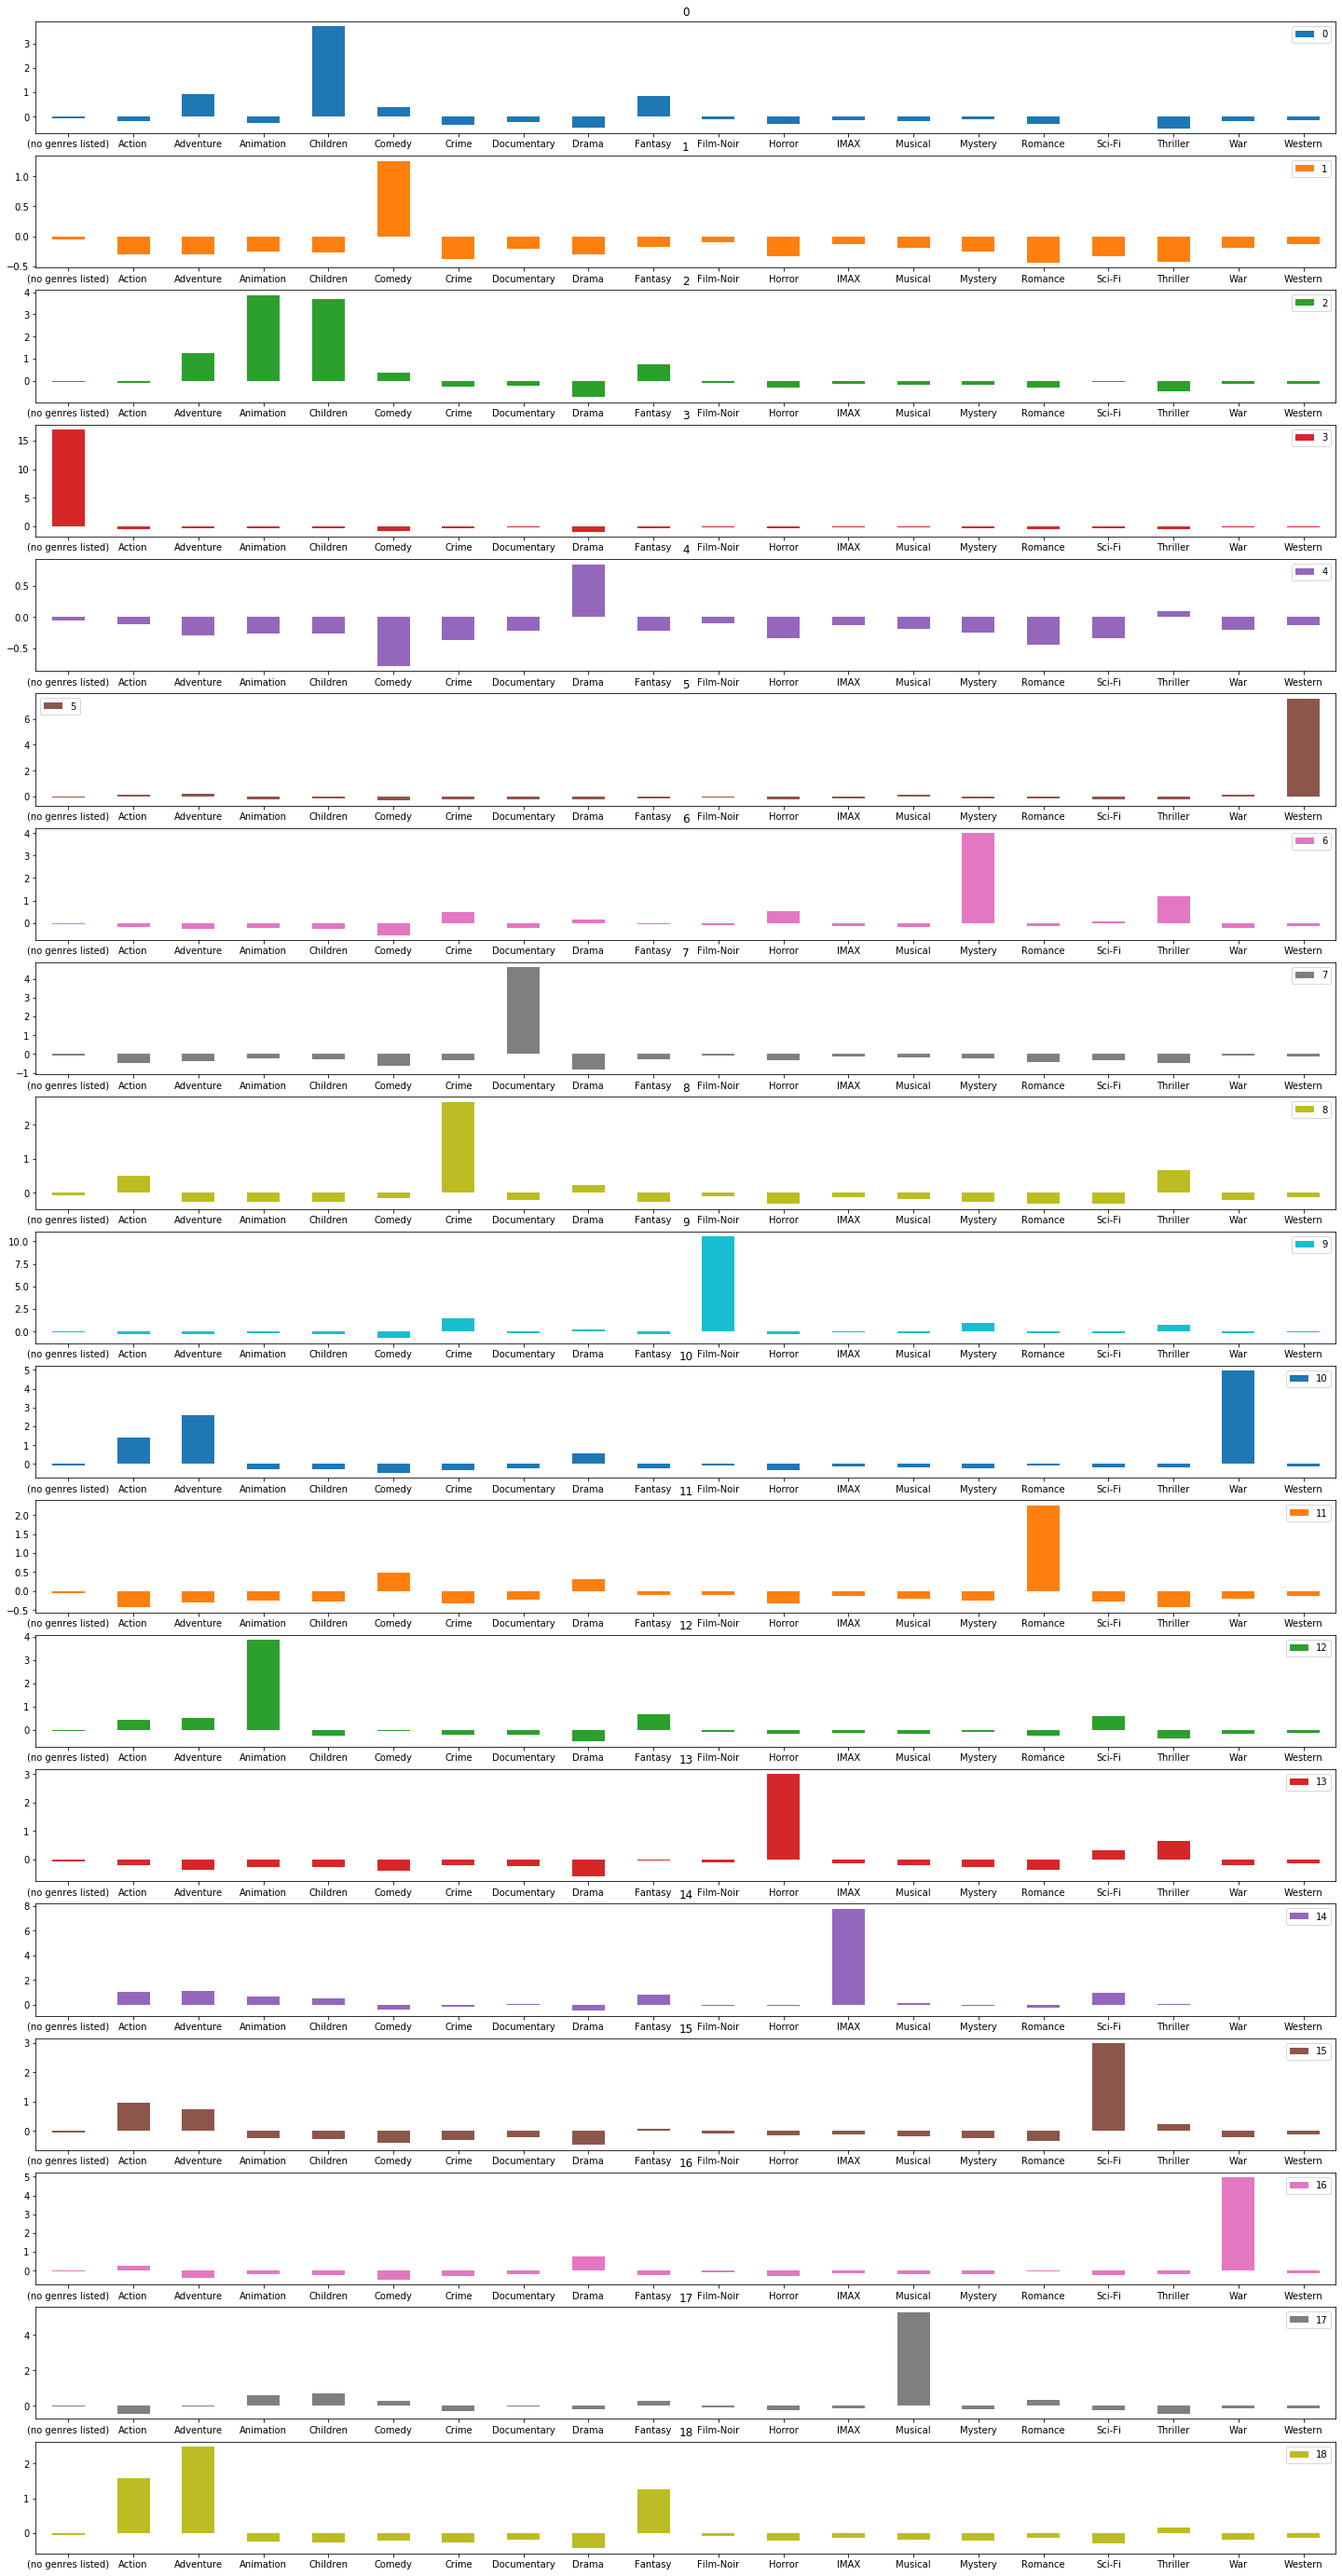

In [22]:
modelo = KMeans (n_clusters=19)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize = (25,50),
               sharex=False,
               rot=0)

In [23]:
matriz_de_distancia = linkage(grupos)

As ligações são demonstradas, quais ramos estão correlacionados

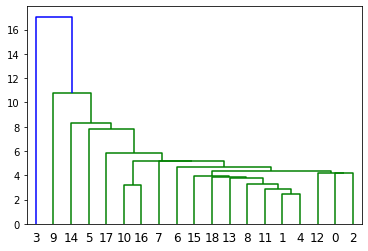

In [25]:
dendograma = dendrogram(matriz_de_distancia)